In [ ]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import regularizers
#from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
housePrices=pd.read_csv('train.csv')

In [ ]:
housePrices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [ ]:
housePrices['GarageYrBlt'].fillna(housePrices['GarageYrBlt'].mean(), inplace=True)

In [ ]:
housePrices['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [ ]:
housePrices[housePrices['MasVnrArea'] == 0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,None,None,None,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,175000
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2010,WD,Normal,142125


In [ ]:
housePrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
housePrices['LotFrontage'].fillna(int(housePrices['LotFrontage'].mean()), inplace=True) # Space between street and home
housePrices['Utilities'].fillna('AllPub', inplace=True) # 1459 AllPub
housePrices['MSZoning'].fillna('RL', inplace=True) # Not needed
housePrices['Exterior1st'].fillna('VinylSd', inplace=True) # Not needed
housePrices['Exterior2nd'].fillna('VinylSd', inplace=True) # Not needed
housePrices['Electrical'].fillna('SBrkr', inplace=True) # 1459 SBrkr
housePrices['KitchenQual'].fillna('GD', inplace=True) # GD is the 2nd most popular (good)
housePrices['Functional'].fillna('Typ', inplace=True) # 1360 Typ 

In [ ]:
housePrices['MasVnrArea'].fillna(0, inplace=True)

In [ ]:
housePrices['Alley'].fillna('None', inplace=True) # No alley

housePrices['BsmtQual'].fillna('None', inplace=True) # No basement
housePrices['BsmtCond'].fillna('None', inplace=True)
housePrices['BsmtExposure'].fillna('None', inplace=True)
housePrices['BsmtFinType2'].fillna('None', inplace=True)
housePrices['BsmtFinType1'].fillna('None', inplace=True)

housePrices['GarageType'].fillna('None', inplace=True) # No garage
housePrices['GarageQual'].fillna('None', inplace=True) 
housePrices['GarageFinish'].fillna('None', inplace=True) 
housePrices['GarageCond'].fillna('None', inplace=True) 
housePrices['GarageYrBlt'].fillna(housePrices['GarageYrBlt'].mean(), inplace=True) # Gotta fill it with something

housePrices['PoolQC'].fillna('None', inplace=True) # No pool
housePrices['Fence'].fillna('None', inplace=True) # No fence
housePrices['MasVnrType'].fillna('None', inplace=True) # No veneer
housePrices['FireplaceQu'].fillna('None', inplace=True) # No fireplace
housePrices['MiscFeature'].fillna('None', inplace=True) # No feature


In [ ]:
housePrices['MSSubClass'] = housePrices['MSSubClass'].astype(str) 

In [ ]:
housePrices.dtypes

MSSubClass      object
MSZoning        object
LotFrontage    float64
LotArea          int64
LotShape        object
OverallQual      int64
OverallCond      int64
SalePrice        int64
dtype: object

In [ ]:
train, test = train_test_split(housePrices, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

934 train examples
234 validation examples
292 test examples


In [ ]:
housePrices_features = train.copy()
housePrices_labels = housePrices_features.pop('SalePrice')
housePrices_labels = housePrices_labels/150000

val_features = val.copy()
val_labels = val.pop('SalePrice')
val_labels = val_labels/150000

In [ ]:
print(housePrices_features.dtypes)
print(housePrices_labels.dtypes)

Id                 int64
MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object
float64


In [ ]:
inputs = {}

for name, column in housePrices_features.items():
  dtype = column.dtype
  if dtype == object:
    dtype = tf.string
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'Id': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'Id')>,
 'MSSubClass': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'MSSubClass')>,
 'MSZoning': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'MSZoning')>,
 'LotFrontage': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'LotFrontage')>,
 'LotArea': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'LotArea')>,
 'Street': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'Street')>,
 'Alley': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'Alley')>,
 'LotShape': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'LotShape')>,
 'LandContour': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'LandContour')>,
 'Utilities': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'Utilities')>,
 'LotConfig': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'LotConfig')>,
 'LandSlope': <KerasTensor: shape

In [ ]:
numeric_inputs = {name:input for name,input in inputs.items()
                  if input.dtype==tf.float32}

x = layers.Concatenate()(list(numeric_inputs.values()))
norm = preprocessing.Normalization()
norm.adapt(np.array(housePrices[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

all_numeric_inputs

<KerasTensor: shape=(None, 36) dtype=float32 (created by layer 'normalization_1')>

In [ ]:
preprocessed_inputs = [all_numeric_inputs]

In [ ]:
for name, input in inputs.items():
  if input.dtype == tf.float32:
    continue
  
  lookup = preprocessing.StringLookup(vocabulary=np.unique(housePrices_features[name]))
  one_hot = preprocessing.CategoryEncoding(max_tokens=lookup.vocab_size())

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)

In [ ]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

housePrices_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

# tf.keras.utils.plot_model(model = housePrices_preprocessing , rankdir="LR", dpi=72, show_shapes=True)

In [ ]:
housePrices_features_dict = {name: np.array(value) 
                         for name, value in housePrices_features.items()}

In [ ]:
features_dict = {name:values[:1] for name, values in housePrices_features_dict.items()}
housePrices_preprocessing(features_dict)

<tf.Tensor: shape=(1, 351), dtype=float32, numpy=
array([[-0.046, -0.638, -0.64 , -2.242,  0.382, -1.201,  0.879, -0.571,
        -0.973, -0.289, -0.673, -1.796, -1.122, -0.795, -0.12 , -1.497,
        -0.82 , -0.241, -1.026, -0.762, -1.062, -0.211, -0.934, -0.951,
         0.   , -2.365, -2.213, -0.752, -0.704, -0.359, -0.116, -0.27 ,
        -0.069, -0.088,  0.251,  0.139,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         1.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  1.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   

In [117]:
def housePrices_model(preprocessing_head, inputs):
  body = tf.keras.Sequential([
    layers.Dense(24,activation='sigmoid', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(4,activation='sigmoid', kernel_regularizer=regularizers.l2(0.001)),
    # layers.Dense(4,activation='relu'),
    layers.Dense(1)
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  model.compile(loss='mse', optimizer='adam', metrics=['mae'])
  return model

housePrices_model = housePrices_model(housePrices_preprocessing, inputs)

In [118]:
val_features_dict = {name: np.array(value) 
                         for name, value in val.items()}
history_1 = housePrices_model.fit(x=housePrices_features_dict, y=housePrices_labels,epochs=350,
                        validation_data=(val_features_dict, val_labels))

Epoch 1/350
30/30 [==============================] - 6s 92ms/step - loss: 0.5902 - mae: 0.5630 - val_loss: 0.4429 - val_mae: 0.4058
Epoch 2/350
30/30 [==============================] - 0s 14ms/step - loss: 0.2785 - mae: 0.3099 - val_loss: 0.3205 - val_mae: 0.3251
Epoch 3/350
30/30 [==============================] - 0s 13ms/step - loss: 0.2189 - mae: 0.2701 - val_loss: 0.2714 - val_mae: 0.2832
Epoch 4/350
30/30 [==============================] - 0s 14ms/step - loss: 0.1852 - mae: 0.2327 - val_loss: 0.2391 - val_mae: 0.2473
Epoch 5/350
30/30 [==============================] - 0s 14ms/step - loss: 0.1621 - mae: 0.2089 - val_loss: 0.2149 - val_mae: 0.2317
Epoch 6/350
30/30 [==============================] - 0s 14ms/step - loss: 0.1460 - mae: 0.1976 - val_loss: 0.1974 - val_mae: 0.2210
Epoch 7/350
30/30 [==============================] - 0s 14ms/step - loss: 0.1336 - mae: 0.1884 - val_loss: 0.1840 - val_mae: 0.2123
Epoch 8/350
30/30 [==============================] - 0s 14ms/step - loss: 0.

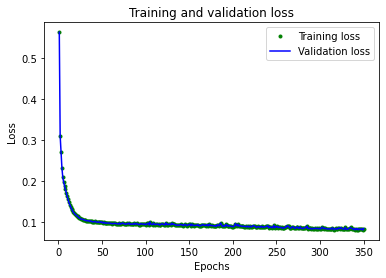

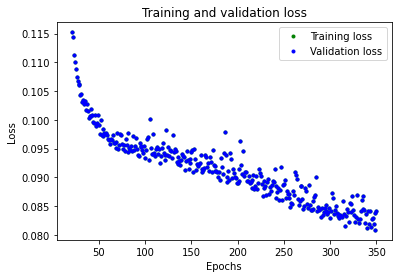

In [119]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
import matplotlib.pyplot as plt
train_loss = history_1.history['mae']
val_loss = history_1.history['mae']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Exclude the first few epochs so the graph is easier to read
SKIP = 20

plt.plot(epochs[SKIP:], train_loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
test2 = pd.read_csv('test.csv')

In [ ]:
test['BsmtFinSF1'].value_counts()

0.0       462
24.0       15
276.0       6
602.0       6
300.0       5
         ... 
1337.0      1
656.0       1
706.0       1
496.0       1
337.0       1
Name: BsmtFinSF1, Length: 669, dtype: int64

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   object 
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
test['SaleType'].fillna('WD', inplace=True)
test['LotFrontage'].fillna(int(test['LotFrontage'].mean()), inplace=True) # Space between street and home
test['Utilities'].fillna('AllPub', inplace=True) # 1459 AllPub
test['MSZoning'].fillna('RL', inplace=True) # Not needed
test['Exterior1st'].fillna('VinylSd', inplace=True) # Not needed
test['Exterior2nd'].fillna('VinylSd', inplace=True) # Not needed
test['Electrical'].fillna('SBrkr', inplace=True) # 1459 SBrkr
test['KitchenQual'].fillna('GD', inplace=True) # GD is the 2nd most popular (good)
test['Functional'].fillna('Typ', inplace=True) # 1360 Typ

test['MasVnrArea'].fillna(0, inplace=True)

test['Alley'].fillna('None', inplace=True) # No alley

test['BsmtQual'].fillna('None', inplace=True) # No basement
test['BsmtCond'].fillna('None', inplace=True)
test['BsmtExposure'].fillna('None', inplace=True)
test['BsmtFinType2'].fillna('None', inplace=True)
test['BsmtFinType1'].fillna('None', inplace=True)

test['GarageType'].fillna('None', inplace=True) # No garage
test['GarageQual'].fillna('None', inplace=True)
test['GarageFinish'].fillna('None', inplace=True)
test['GarageCond'].fillna('None', inplace=True)
test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean(), inplace=True) # Gotta fill it with something

test['PoolQC'].fillna('None', inplace=True) # No pool
test['Fence'].fillna('None', inplace=True) # No fence
test['MasVnrType'].fillna('None', inplace=True) # No veneer
test['FireplaceQu'].fillna('None', inplace=True) # No fireplace
test['MiscFeature'].fillna('None', inplace=True) # No feature

test['MSSubClass'] = test['MSSubClass'].astype(str) 


In [ ]:
test['GarageCars'].fillna(0, inplace=True)
test['GarageArea'].fillna(0, inplace=True)
test['BsmtHalfBath'].fillna(0, inplace=True)
test['BsmtFullBath'].fillna(0, inplace=True)
test['BsmtFinSF1'].fillna(0, inplace=True)

In [ ]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('SalePrice')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

actuals_available = True
if 'SalePrice' not in list(test.columns):
    test['SalePrice'] = 0 #any value - we will drop
    actuals_available = False

test_ds = df_to_dataset(test, shuffle=False, batch_size=len(test))

In [ ]:
ans = housePrices_model.predict(test_ds)

1/1 [==============================] - 0s 121ms/step


In [ ]:
print(ans)

[[0.825]
 [1.179]
 [1.206]
 ...
 [0.936]
 [0.657]
 [1.522]]


In [ ]:
len(ans)

1459

In [ ]:
ans.shape()

TypeError: ignored

In [120]:
ans = housePrices_model.predict(test_ds)
ans *= 150000
final_data = pd.DataFrame(data={'SalePrice': [num[0] for num in list(ans)]})
final_data['Id'] = test['Id']
final_data['SalePrice'].fillna(final_data['SalePrice'].mean(), inplace=True)
final_data[['Id', 'SalePrice']].to_csv('submission.csv', index=False)

1/1 [==============================] - 2s 2s/step


In [ ]:
ans.shape

(1459, 1)

In [ ]:
final_data = pd.DataFrame(data={'SalePrice': [num[0] for num in list(ans)]})

In [ ]:
final_data['Id'] = test2['Id']

In [ ]:
final_data.head()

,SalePrice,Id
0,125836.929688,1461
1,161359.593750,1462
2,177726.437500,1463
3,181634.328125,1464
4,205981.250000,1465


In [ ]:
final_data['SalePrice'].fillna(final_data['SalePrice'].mean(), inplace=True)

In [ ]:
final_data[['Id', 'SalePrice']].to_csv('submission.csv', index=False)

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SalePrice  1459 non-null   float32
 1   Id         1459 non-null   int64  
dtypes: float32(1), int64(1)
memory usage: 17.2 KB
